# <span style='color:red'> Linear Regression, SVR on House Power Consumption </span>

# <span style='color:blue'>EDA and FE </span>

1.Data Profiling 

2.Stastical analysis

3.Graphical Analysis

4.Data Cleaning

5.Data Scaling

# <span style='color:blue'>Linear Regression Model </span>

1.Linear Regression Model

2.Performance metrics for above model

# <span style='color:blue'>Ridge Regression Model </span>

1.Ridge Regression Model

2.Performance metrics for above model

# <span style='color:blue'>Lasso Regression Model </span>

1.Lasso Regression Model

2.Performance metrics for above model

# <span style='color:blue'>Elastic-Net Regression Model </span>

1.Elastic-Net Regression Model

2.Performance metrics for above model

# <span style='color:blue'>Support Vector Regressor Model </span>

1.Support Vector Regressor Model

2.Performance metrics for above model

In [3]:
from IPython import display
display.Image('desktop/Datasets/image HPC.png')

# <span style='color:red'> 1.0 Importing required libraries </span>

In [1]:
### Pandas and Numpy
import numpy as np
import pandas as pd

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# <span style='color:red'> 2.0 Importing Dataset and Data Cleaning </span>

In [2]:
### importing original dataset
data=pd.read_csv('Desktop/Datasets/household_power_consumption.txt', sep=";")
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# <span style='color:green'> 2.1 Dataset Information </span>

# <span style='color:black'>Data Set Information:</span>

**This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).**

**Notes:

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

# <span style='color:green'> Attribute Information: </span>

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [3]:
### Getting shape of original dataset
data.shape

(2075259, 9)

In [4]:
### Checking Data types of features in original dataset
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

# <span style='color:red'> 2.2 Taking Fifty Thousand Records as sample from dataset </span>

In [5]:
### taking 50,000 samples from original dataset without replacement
### reseting the index of records and dropping index 

data_sample=data.sample(n=50000, replace=False)
data_sample=data_sample.reset_index()
data_sample.drop('index', axis=1, inplace=True)
data_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/9/2007,08:12:00,0.284,0.000,240.030,1.200,0.000,0.000,0.0
1,18/10/2010,15:49:00,0.488,0.194,242.180,2.200,0.000,1.000,1.0
2,27/4/2010,22:28:00,0.350,0.098,243.710,1.400,0.000,0.000,0.0
3,25/5/2009,15:34:00,0.464,0.000,237.060,2.000,0.000,1.000,0.0
4,20/1/2010,01:18:00,0.430,0.248,244.670,2.000,0.000,1.000,1.0


In [6]:
### checking shape of sampled dataset
data_sample.shape

(50000, 9)

In [7]:
### saving sampled dataset to csv file
data_sample.to_csv('Sampled_data_HP.csv',index=False)

In [8]:
### checking unique values in each feature to form data cleaning strategy if necessary
for feature in[feature for feature in data_sample.columns if feature not in ['Date','Time']]:
    print("feature {} has these {} unique values.\n".format(feature,data_sample[feature].unique()))


feature Global_active_power has these ['0.284' '0.488' '0.350' ... 0.57 1.996 '6.664'] unique values.

feature Global_reactive_power has these ['0.000' '0.194' '0.098' '0.248' '0.102' '0.238' '0.232' '0.052' '0.112'
 '0.170' '0.226' '0.284' '0.104' '0.162' '0.054' '0.258' '0.458' '0.254'
 '0.266' '0.074' '0.250' 0.184 '0.110' '0.208' '0.212' '0.230' '0.180'
 '0.172' '0.106' '0.222' '0.394' '0.340' '0.120' '0.166' '0.066' '0.092'
 '0.224' '0.064' '0.056' '0.210' '0.150' '0.058' '0.196' '0.324' '0.084'
 '0.396' '0.366' '0.334' '0.046' '0.080' '0.374' '?' '0.186' '0.184'
 '0.178' '0.118' '0.076' '0.216' '0.228' '0.312' '0.126' '0.438' '0.082'
 '0.146' '0.100' '0.204' '0.138' '0.268' '0.116' '0.060' '0.134' '0.136'
 '0.240' '0.190' '0.182' '0.070' '0.200' '0.598' '0.164' '0.188' 0.258
 '0.090' 0.0 '0.286' '0.096' '0.094' '0.152' '0.244' '0.062' '0.236'
 '0.050' '0.218' '0.206' '0.304' '0.328' '0.344' '0.068' '0.262' '0.316'
 '0.360' '0.214' '0.072' 0.122 '0.364' '0.242' '0.354' '0.048' '0.

In [9]:
### checking nunique values in each feature to form data cleaning strategy if necessary

for feature in[feature for feature in data_sample.columns if feature not in ['Date','Time']]:
    print("feature {} has these {} nunique values.\n".format(feature,data_sample[feature].nunique()))


feature Global_active_power has these 3214 nunique values.

feature Global_reactive_power has these 514 nunique values.

feature Voltage has these 2790 nunique values.

feature Global_intensity has these 254 nunique values.

feature Sub_metering_1 has these 88 nunique values.

feature Sub_metering_2 has these 88 nunique values.

feature Sub_metering_3 has these 32 nunique values.



In [10]:
### checking no of records in each feature that have value as ?

for feature in [feature for feature in data_sample.columns if feature not in ['Date', 'Time']]:
    print("The feature {} has {} ? in it".format(feature,data_sample[data_sample[feature]=='?'].shape))


The feature Global_active_power has (602, 9) ? in it
The feature Global_reactive_power has (602, 9) ? in it
The feature Voltage has (602, 9) ? in it
The feature Global_intensity has (602, 9) ? in it
The feature Sub_metering_1 has (602, 9) ? in it
The feature Sub_metering_2 has (602, 9) ? in it
The feature Sub_metering_3 has (0, 9) ? in it


In [11]:
### replacing ? values with nan values
data_sample.replace("?",np.nan,inplace=True)

In [12]:
### checking no of records in each feature that have value as ? after replacing them
for feature in [feature for feature in data_sample.columns if feature not in ['Date','Time']]:
    print('feature {} has {} ? in it'.format(feature,data_sample[data_sample[feature]=='?'].shape))

feature Global_active_power has (0, 9) ? in it
feature Global_reactive_power has (0, 9) ? in it
feature Voltage has (0, 9) ? in it
feature Global_intensity has (0, 9) ? in it
feature Sub_metering_1 has (0, 9) ? in it
feature Sub_metering_2 has (0, 9) ? in it
feature Sub_metering_3 has (0, 9) ? in it


In [13]:
### dropping nan values
data_sample.dropna(inplace=True)

In [14]:
### checking data type, shape and null values
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49398 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   49398 non-null  object 
 1   Time                   49398 non-null  object 
 2   Global_active_power    49398 non-null  object 
 3   Global_reactive_power  49398 non-null  object 
 4   Voltage                49398 non-null  object 
 5   Global_intensity       49398 non-null  object 
 6   Sub_metering_1         49398 non-null  object 
 7   Sub_metering_2         49398 non-null  object 
 8   Sub_metering_3         49398 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [15]:
### checking values in Sub_metering_1 feature 
# observation: all values are integers but in float data type so can be converted to int data type
data_sample['Sub_metering_1'].unique()

array(['0.000', '2.000', 0.0, '1.000', '33.000', '39.000', '25.000',
       '41.000', '32.000', '36.000', 2.0, '11.000', '37.000', '44.000',
       '38.000', '27.000', '18.000', 1.0, '5.000', '31.000', '13.000',
       '7.000', '17.000', 37.0, '49.000', '3.000', '53.000', '9.000',
       '40.000', '24.000', '29.000', '74.000', '4.000', '6.000', 16.0,
       '8.000', '10.000', '34.000', '60.000', '14.000', '42.000',
       '20.000', '35.000', '12.000', '23.000', '21.000', '16.000',
       '30.000', '70.000', 42.0, '56.000', 31.0, '45.000', '28.000',
       '46.000', 53.0, '19.000', '75.000', 12.0, '22.000', '15.000',
       '26.000', 14.0, '66.000', 40.0, '78.000', 36.0, 33.0, '72.000',
       '73.000', '47.000', 4.0, 17.0, 39.0, '79.000', 52.0, '51.000',
       '43.000', '48.000', 15.0, 30.0, 38.0, 24.0, 20.0, 3.0, '50.000',
       '55.000'], dtype=object)

In [16]:
### checking values in Sub_metering_2 feature 
# observation: all values are integers but in float data type so can be converted to int data type
data_sample['Sub_metering_2'].unique()

array(['0.000', '1.000', '2.000', '37.000', '24.000', 2.0, '20.000',
       '5.000', '17.000', 1.0, 0.0, '36.000', '29.000', '34.000', '3.000',
       '71.000', '4.000', '27.000', '31.000', '10.000', 40.0, '39.000',
       '72.000', '19.000', '42.000', '28.000', '6.000', '8.000', '49.000',
       '18.000', '13.000', '70.000', '15.000', '33.000', '35.000',
       '26.000', '74.000', '7.000', '38.000', '16.000', '30.000', 37.0,
       '23.000', '22.000', '58.000', '73.000', '40.000', '25.000', 39.0,
       '32.000', '21.000', '12.000', 35.0, '68.000', '9.000', '63.000',
       28.0, 5.0, 63.0, '14.000', '41.000', 36.0, '66.000', 9.0, '60.000',
       '55.000', 4.0, '79.000', '52.000', '44.000', '57.000', '64.000',
       75.0, '45.000', '11.000', '77.000', '43.000', '67.000', '75.000',
       '65.000', '54.000', '61.000', 6.0, 34.0, '48.000', '69.000',
       '46.000'], dtype=object)

In [17]:
### checking values in Sub_metering_3 feature 
# observation: all values are integers but in float data type so can be converted to int data type
data_sample['Sub_metering_3'].unique()

array([ 0.,  1., 17., 19., 18.,  4., 28.,  5., 11., 12., 13., 14., 16.,
       22.,  8., 27., 20.,  9., 24., 29.,  7.,  6., 26., 30., 10., 23.,
        3., 21., 25.,  2., 15., 31.])

In [18]:
### converting to str datatype so replace function can be used.
data_sample['Sub_metering_3']=data_sample['Sub_metering_3'].astype('str')

In [19]:
### stripping . and zero from below mentioned features so it can be converted to integer

In [20]:
data_sample['Sub_metering_1']=data_sample['Sub_metering_1'].str.split(".", expand=True)[0]
data_sample['Sub_metering_2']=data_sample['Sub_metering_2'].str.split(".", expand=True)[0]
data_sample['Sub_metering_3']=data_sample['Sub_metering_3'].str.split(".", expand=True)[0]

In [21]:
### checking integer values
data_sample['Sub_metering_1'].unique()

array(['0', '2', nan, '1', '33', '39', '25', '41', '32', '36', '11', '37',
       '44', '38', '27', '18', '5', '31', '13', '7', '17', '49', '3',
       '53', '9', '40', '24', '29', '74', '4', '6', '8', '10', '34', '60',
       '14', '42', '20', '35', '12', '23', '21', '16', '30', '70', '56',
       '45', '28', '46', '19', '75', '22', '15', '26', '66', '78', '72',
       '73', '47', '79', '51', '43', '48', '50', '55'], dtype=object)

In [22]:
### checking integer values
data_sample['Sub_metering_2'].unique()

array(['0', '1', '2', '37', '24', nan, '20', '5', '17', '36', '29', '34',
       '3', '71', '4', '27', '31', '10', '39', '72', '19', '42', '28',
       '6', '8', '49', '18', '13', '70', '15', '33', '35', '26', '74',
       '7', '38', '16', '30', '23', '22', '58', '73', '40', '25', '32',
       '21', '12', '68', '9', '63', '14', '41', '66', '60', '55', '79',
       '52', '44', '57', '64', '45', '11', '77', '43', '67', '75', '65',
       '54', '61', '48', '69', '46'], dtype=object)

In [23]:
### checking integer values
data_sample['Sub_metering_3'].unique()

array(['0', '1', '17', '19', '18', '4', '28', '5', '11', '12', '13', '14',
       '16', '22', '8', '27', '20', '9', '24', '29', '7', '6', '26', '30',
       '10', '23', '3', '21', '25', '2', '15', '31'], dtype=object)

In [24]:
### checking null values
data_sample.isnull().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1           986
Sub_metering_2           986
Sub_metering_3             0
dtype: int64

In [25]:
# dropping null values
data_sample.dropna(inplace=True)

In [26]:
### checking data type and null values
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48412 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   48412 non-null  object
 1   Time                   48412 non-null  object
 2   Global_active_power    48412 non-null  object
 3   Global_reactive_power  48412 non-null  object
 4   Voltage                48412 non-null  object
 5   Global_intensity       48412 non-null  object
 6   Sub_metering_1         48412 non-null  object
 7   Sub_metering_2         48412 non-null  object
 8   Sub_metering_3         48412 non-null  object
dtypes: object(9)
memory usage: 3.7+ MB


In [27]:
data_sample.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [28]:
### creating dict of data type conversion
datatypes_convert= {'Global_active_power':'float64', 'Global_reactive_power':'float64',
       'Voltage':'float64', 'Global_intensity':'float64', 'Sub_metering_1':'int64', 'Sub_metering_2':'int64',
       'Sub_metering_3':'int64'}

In [29]:
### changing data type of numerical features to float or int
data_sample=data_sample.astype(datatypes_convert)
data_sample.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1             int64
Sub_metering_2             int64
Sub_metering_3             int64
dtype: object

In [30]:
### converting datatype of Date feature to datetime
data_sample['Date']=pd.to_datetime(data_sample['Date'], format="%d/%m/%Y")

In [31]:
### seperating day and month, creating new feature for day and month
data_sample['day']=data_sample['Date'].dt.day
data_sample['month']=data_sample['Date'].dt.month

In [32]:
### dropping Time this is not important and Date is already used in day and month
data_sample.drop('Time',axis=1,inplace=True)
data_sample.drop('Date',axis=1,inplace=True)

In [33]:
## checking values and features after data cleaning
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
0,0.284,0.000,240.03,1.2,0,0,0,1,9
1,0.488,0.194,242.18,2.2,0,1,1,18,10
2,0.350,0.098,243.71,1.4,0,0,0,27,4
3,0.464,0.000,237.06,2.0,0,1,0,25,5
4,0.430,0.248,244.67,2.0,0,1,1,20,1


In [34]:
### checking null values 
data_sample.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
day                      0
month                    0
dtype: int64

In [35]:
### checking datatypes
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48412 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    48412 non-null  float64
 1   Global_reactive_power  48412 non-null  float64
 2   Voltage                48412 non-null  float64
 3   Global_intensity       48412 non-null  float64
 4   Sub_metering_1         48412 non-null  int64  
 5   Sub_metering_2         48412 non-null  int64  
 6   Sub_metering_3         48412 non-null  int64  
 7   day                    48412 non-null  int64  
 8   month                  48412 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 3.7 MB


# <span style='color:red'> 2.3 Creating Dependent Feature </span>

In [36]:
### Creating target feature as Total_power_use which is sum of Sub_metering_1,2 and 3

data_sample['Total_power_use']=data_sample['Sub_metering_1']+data_sample['Sub_metering_2']+data_sample['Sub_metering_3']
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,Total_power_use
0,0.284,0.000,240.03,1.2,0,0,0,1,9,0
1,0.488,0.194,242.18,2.2,0,1,1,18,10,2
2,0.350,0.098,243.71,1.4,0,0,0,27,4,0
3,0.464,0.000,237.06,2.0,0,1,0,25,5,1
4,0.430,0.248,244.67,2.0,0,1,1,20,1,2


In [37]:
### saving cleaned dataset to csv
data_sample.to_csv('household_power_consumption_cleaned.csv',index=False)

# <span style='color:red'> 2.4 Uploading Data to MongoDB </span>

In [38]:
### Uploading dataset to MongoDB

In [39]:
### creating connection with MongoDB
import pymongo
from pymongo import MongoClient

In [40]:
Client = MongoClient('Localhost',27017)

In [41]:
db=Client['Power_consumption']
collection=db['Household_power_data']

In [42]:
### Converting dataframe to dict so it can be uploaded to MongoDB
data_sample.reset_index(inplace=True)
data_dict = data_sample.to_dict("records")

In [44]:
# Insert collection to MongoDB
collection.insert_many(data_dict)

# <span style='color:red'> 2.5 Retreiving Data to MongoDB </span>

In [45]:
### Locating our collection and data in MongoDb using find() method
data_from_mongodb=collection.find()

In [46]:
### converting data from MongoDb to Dataframe in pandas
data_mongodb = pd.DataFrame(data_from_mongodb)

In [47]:
### first 5 records in dataset
data_mongodb.head()

,_id,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,Total_power_use,level_0
0,641984d17e9c7c7fa7311dd1,0,1.740,0.000,237.02,7.2,0,0,17,12,11,17,NaN
1,641984d17e9c7c7fa7311dd2,1,0.174,0.150,239.58,0.8,0,0,0,30,8,0,NaN
2,641984d17e9c7c7fa7311dd3,2,1.748,0.378,238.59,7.4,0,5,0,11,2,5,NaN
3,641984d17e9c7c7fa7311dd4,3,0.302,0.106,240.20,1.2,0,0,1,9,9,1,NaN
4,641984d17e9c7c7fa7311dd5,4,0.242,0.000,242.26,1.2,0,0,0,29,11,0,NaN


In [48]:
### dropping _id and index feature from dataset imported from MongoDB

data_mongodb.drop(['_id','index','level_0'], axis=1, inplace=True)

In [49]:
data_mongodb.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,Total_power_use
0,1.740,0.000,237.02,7.2,0,0,17,12,11,17
1,0.174,0.150,239.58,0.8,0,0,0,30,8,0
2,1.748,0.378,238.59,7.4,0,5,0,11,2,5
3,0.302,0.106,240.20,1.2,0,0,1,9,9,1
4,0.242,0.000,242.26,1.2,0,0,0,29,11,0


In [50]:
### Saving dataset imported from MongoDB to csv file
data_mongodb.to_csv('data_from_mongodb_power_consumption.csv')

# <span style='color:red'> 3.0 Analysing Dataset </span>

In [51]:
### Getting difference in min and max values of feature
data_mongodb.max()- data_mongodb.min()

Global_active_power        9.86
Global_reactive_power      1.19
Voltage                   30.04
Global_intensity          43.20
Sub_metering_1            81.00
Sub_metering_2            79.00
Sub_metering_3            31.00
day                       30.00
month                     11.00
Total_power_use          133.00
dtype: float64

# <span style='color:red'> 3.1 Numerical Features </span>

In [52]:
### Getting list of numerical features
numerical_features = data_mongodb.columns
print(numerical_features)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'day', 'month', 'Total_power_use'],
      dtype='object')


In [53]:
### getting count of unique values in each numerical feature

for feature in numerical_features:
    print('feature {} has this many no of {} values'.format(feature,data_mongodb[feature].nunique()))

feature Global_active_power has this many no of 3373 values
feature Global_reactive_power has this many no of 428 values
feature Voltage has this many no of 2479 values
feature Global_intensity has this many no of 196 values
feature Sub_metering_1 has this many no of 79 values
feature Sub_metering_2 has this many no of 80 values
feature Sub_metering_3 has this many no of 32 values
feature day has this many no of 31 values
feature month has this many no of 12 values
feature Total_power_use has this many no of 122 values


# <span style='color:red'> 3.2 Discrete Numerical Features </span>

In [54]:
### Getting list of Discreate features

discrete_features= [feature for feature in numerical_features if data_mongodb[feature].nunique()<32]
discrete_features

['day', 'month']

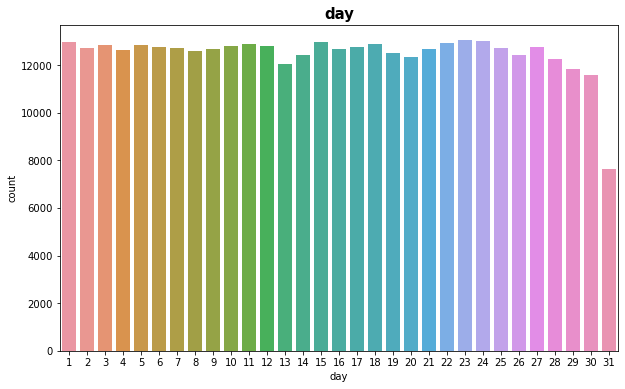

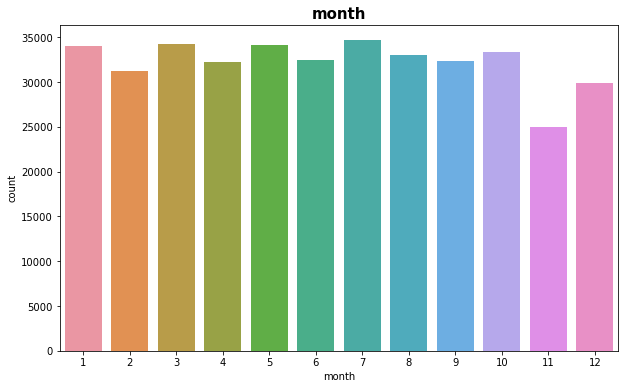

In [55]:
for feature in discrete_features:
    plt.figure(figsize=(10,6))
    sns.countplot(data=data_mongodb ,x=feature)
    plt.title(feature,fontsize=15,fontweight='bold')
    plt.show();

# <span style='color:red'> 3.3 Continuous Numerical Features </span>

In [56]:
### getting list of continuous features
continuous_features= [feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_power_use']


# <span style='color:red'> 3.3.1 Distribution of Continuous Numerical Features </span>

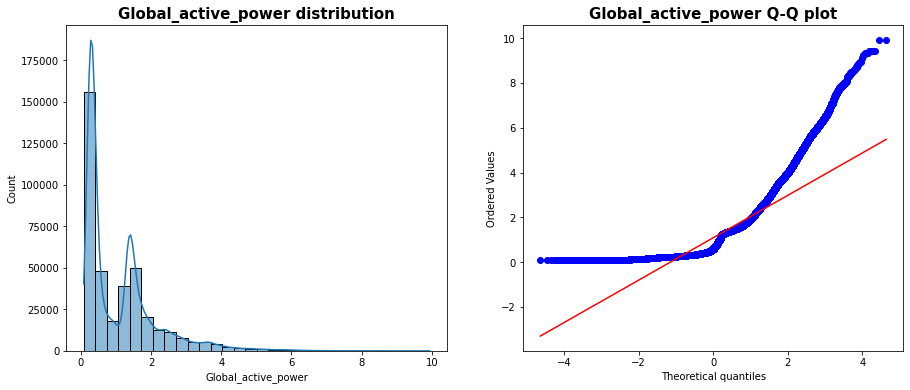

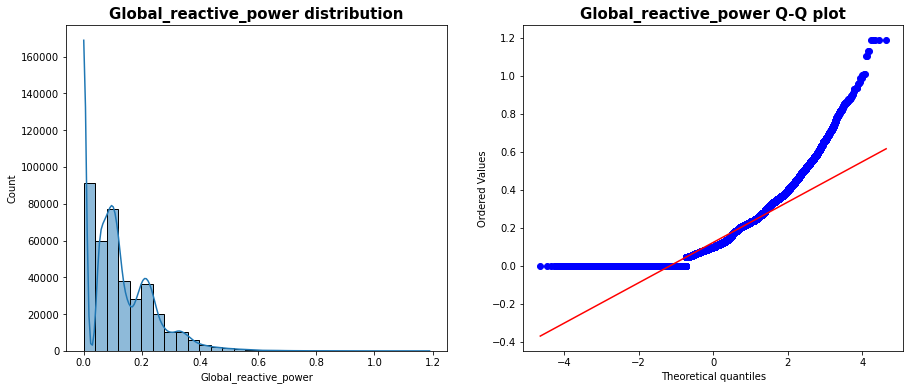

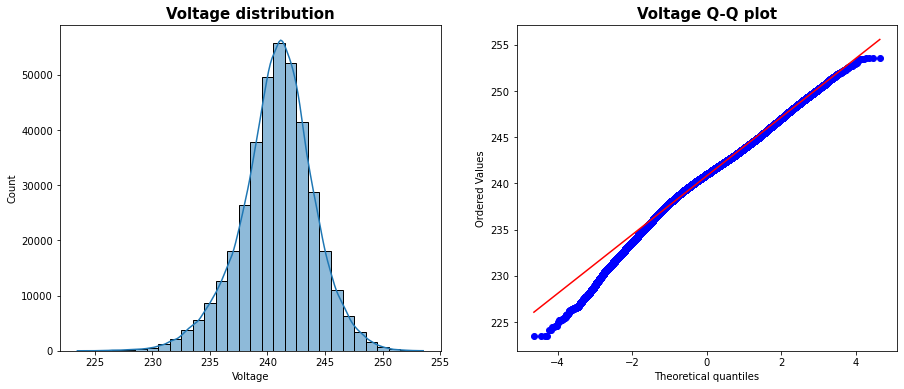

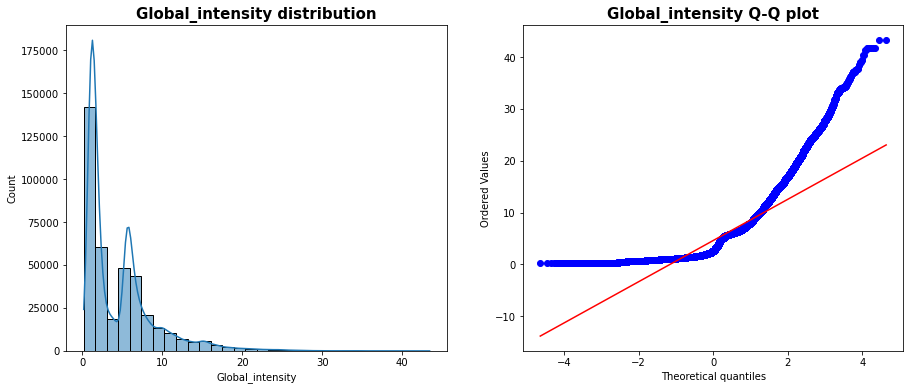

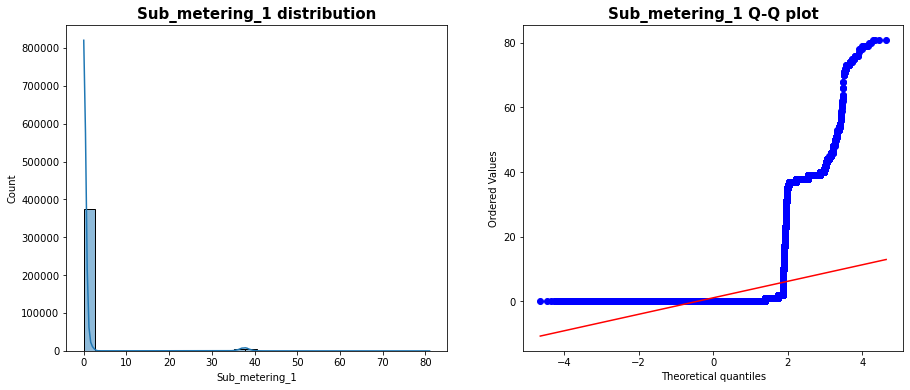

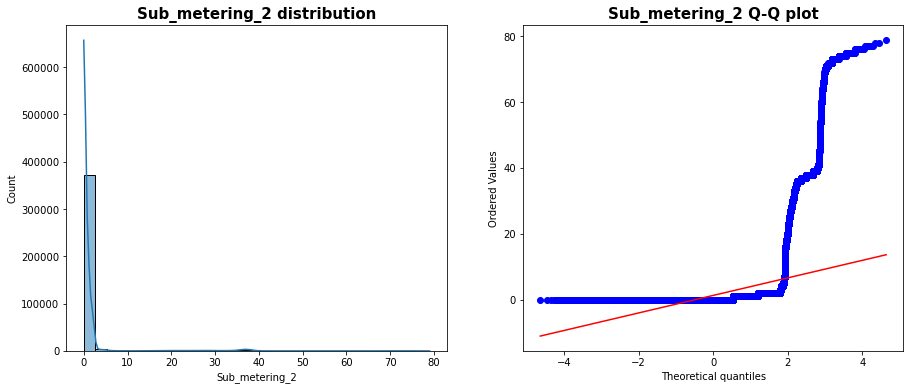

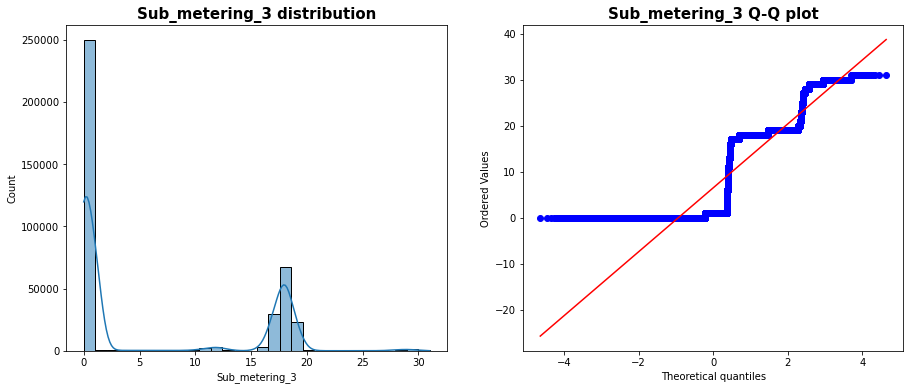

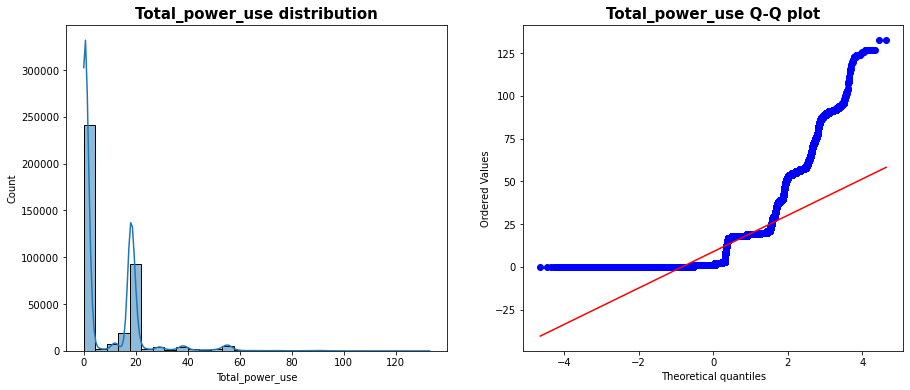

In [57]:
### Checking distribution of Continuous numerical features

for feature in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data= data_mongodb , x=feature, kde=True,bins=30)
    plt.title('{} distribution'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    stats.probplot(data_mongodb[feature] , dist='norm' , plot=plt) 
    plt.title('{} Q-Q plot'.format(feature),fontsize=15,fontweight='bold')
    plt.show();

# <span style='color:red'> 3.3.2 Comparing Numerical features with Dependent feature </span>

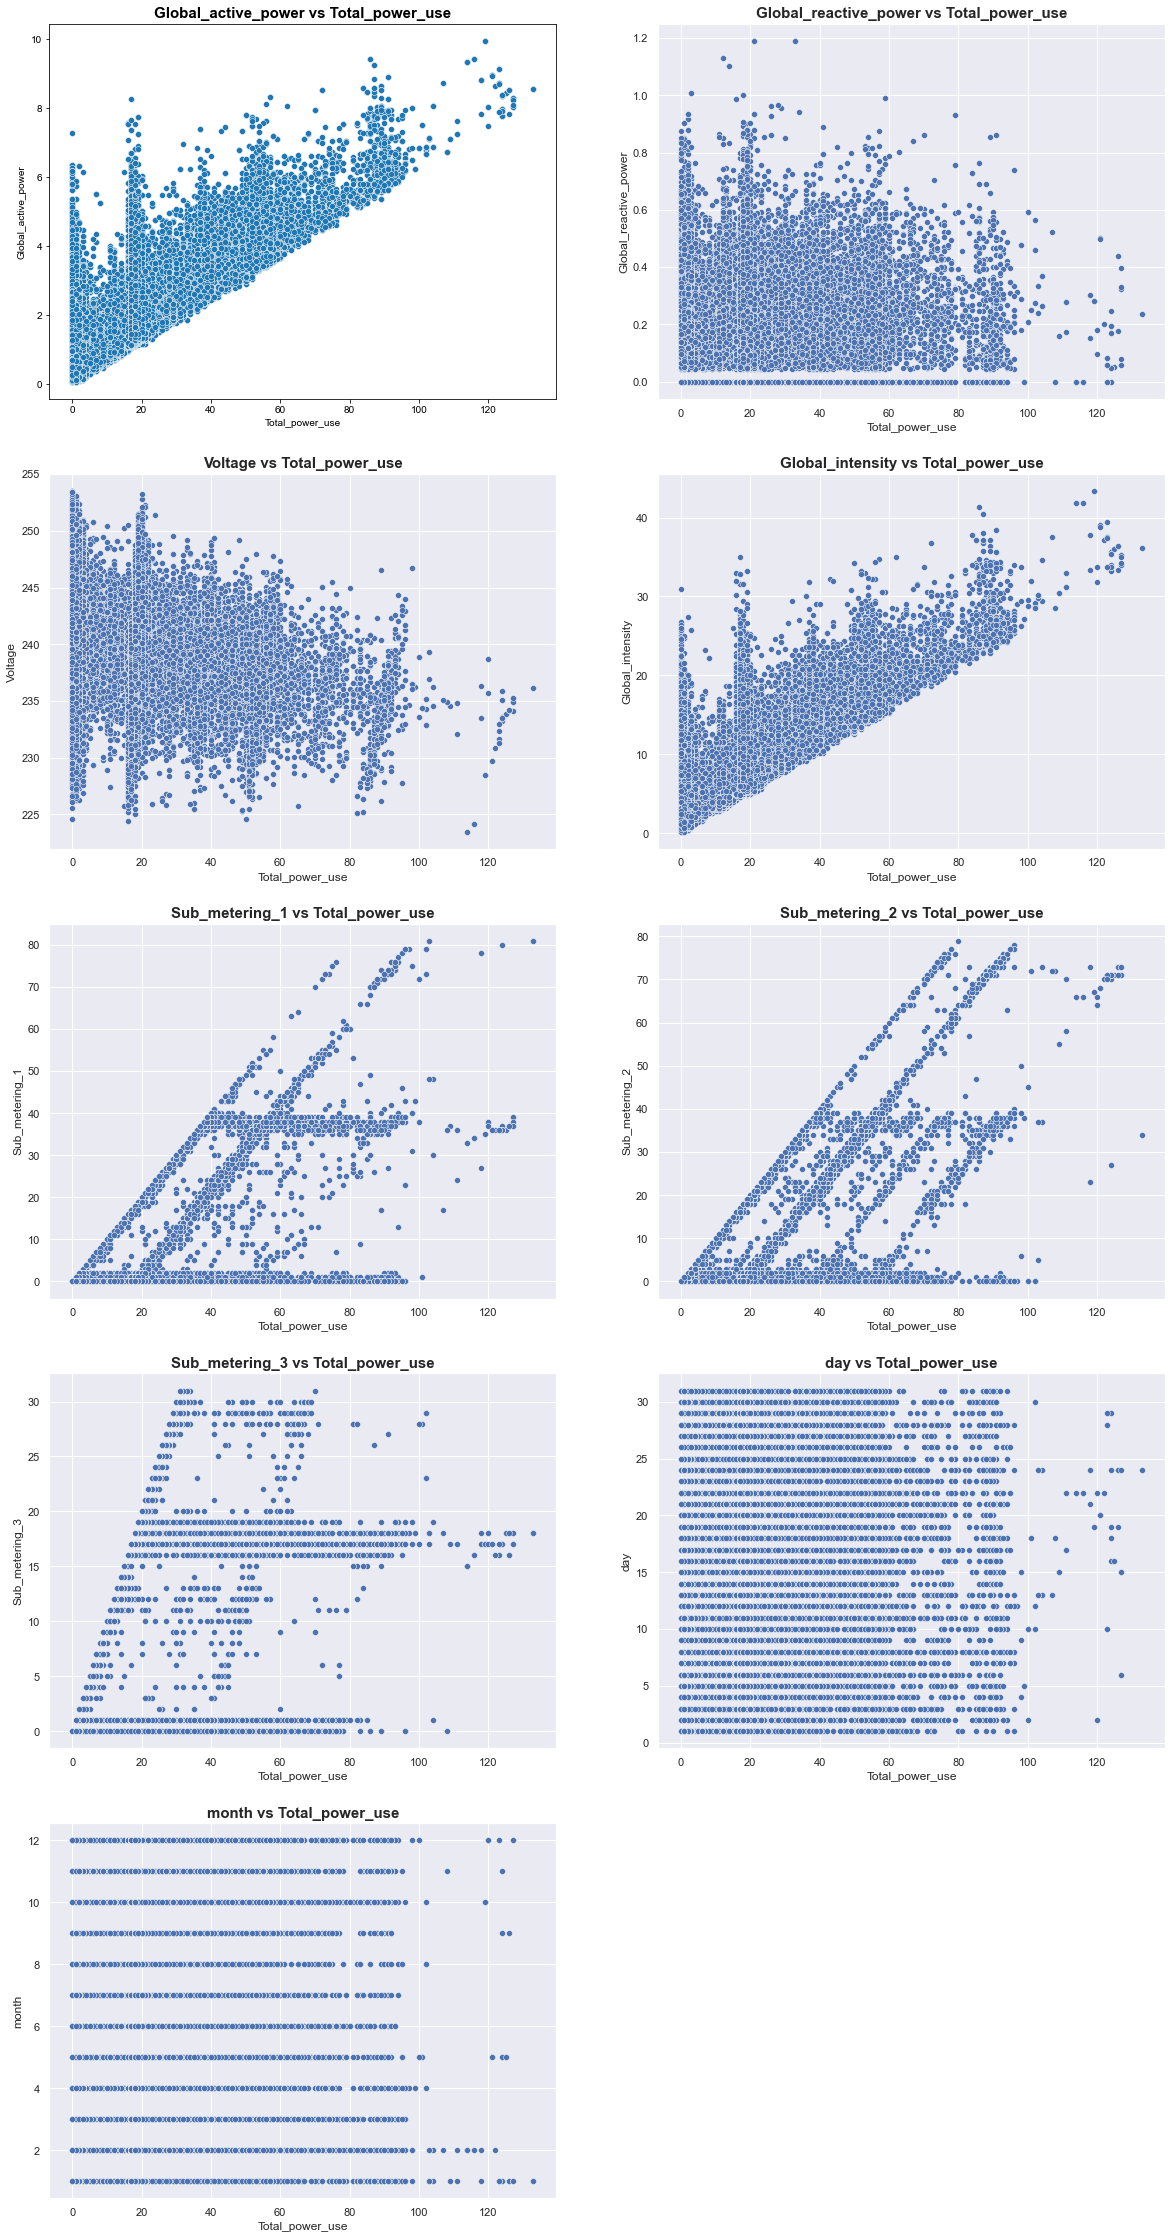

In [58]:
plt.figure(figsize=(20,40))
for feature in enumerate(feature for feature in numerical_features if feature not in ['Total_power_use']):
    plt.subplot(5,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,8)})
    sns.scatterplot(data=data_mongodb,y=feature[1],x='Total_power_use')
    plt.title('{} vs Total_power_use' .format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

# <span style='color:red'> 3.3.3 Checking Outliers </span>

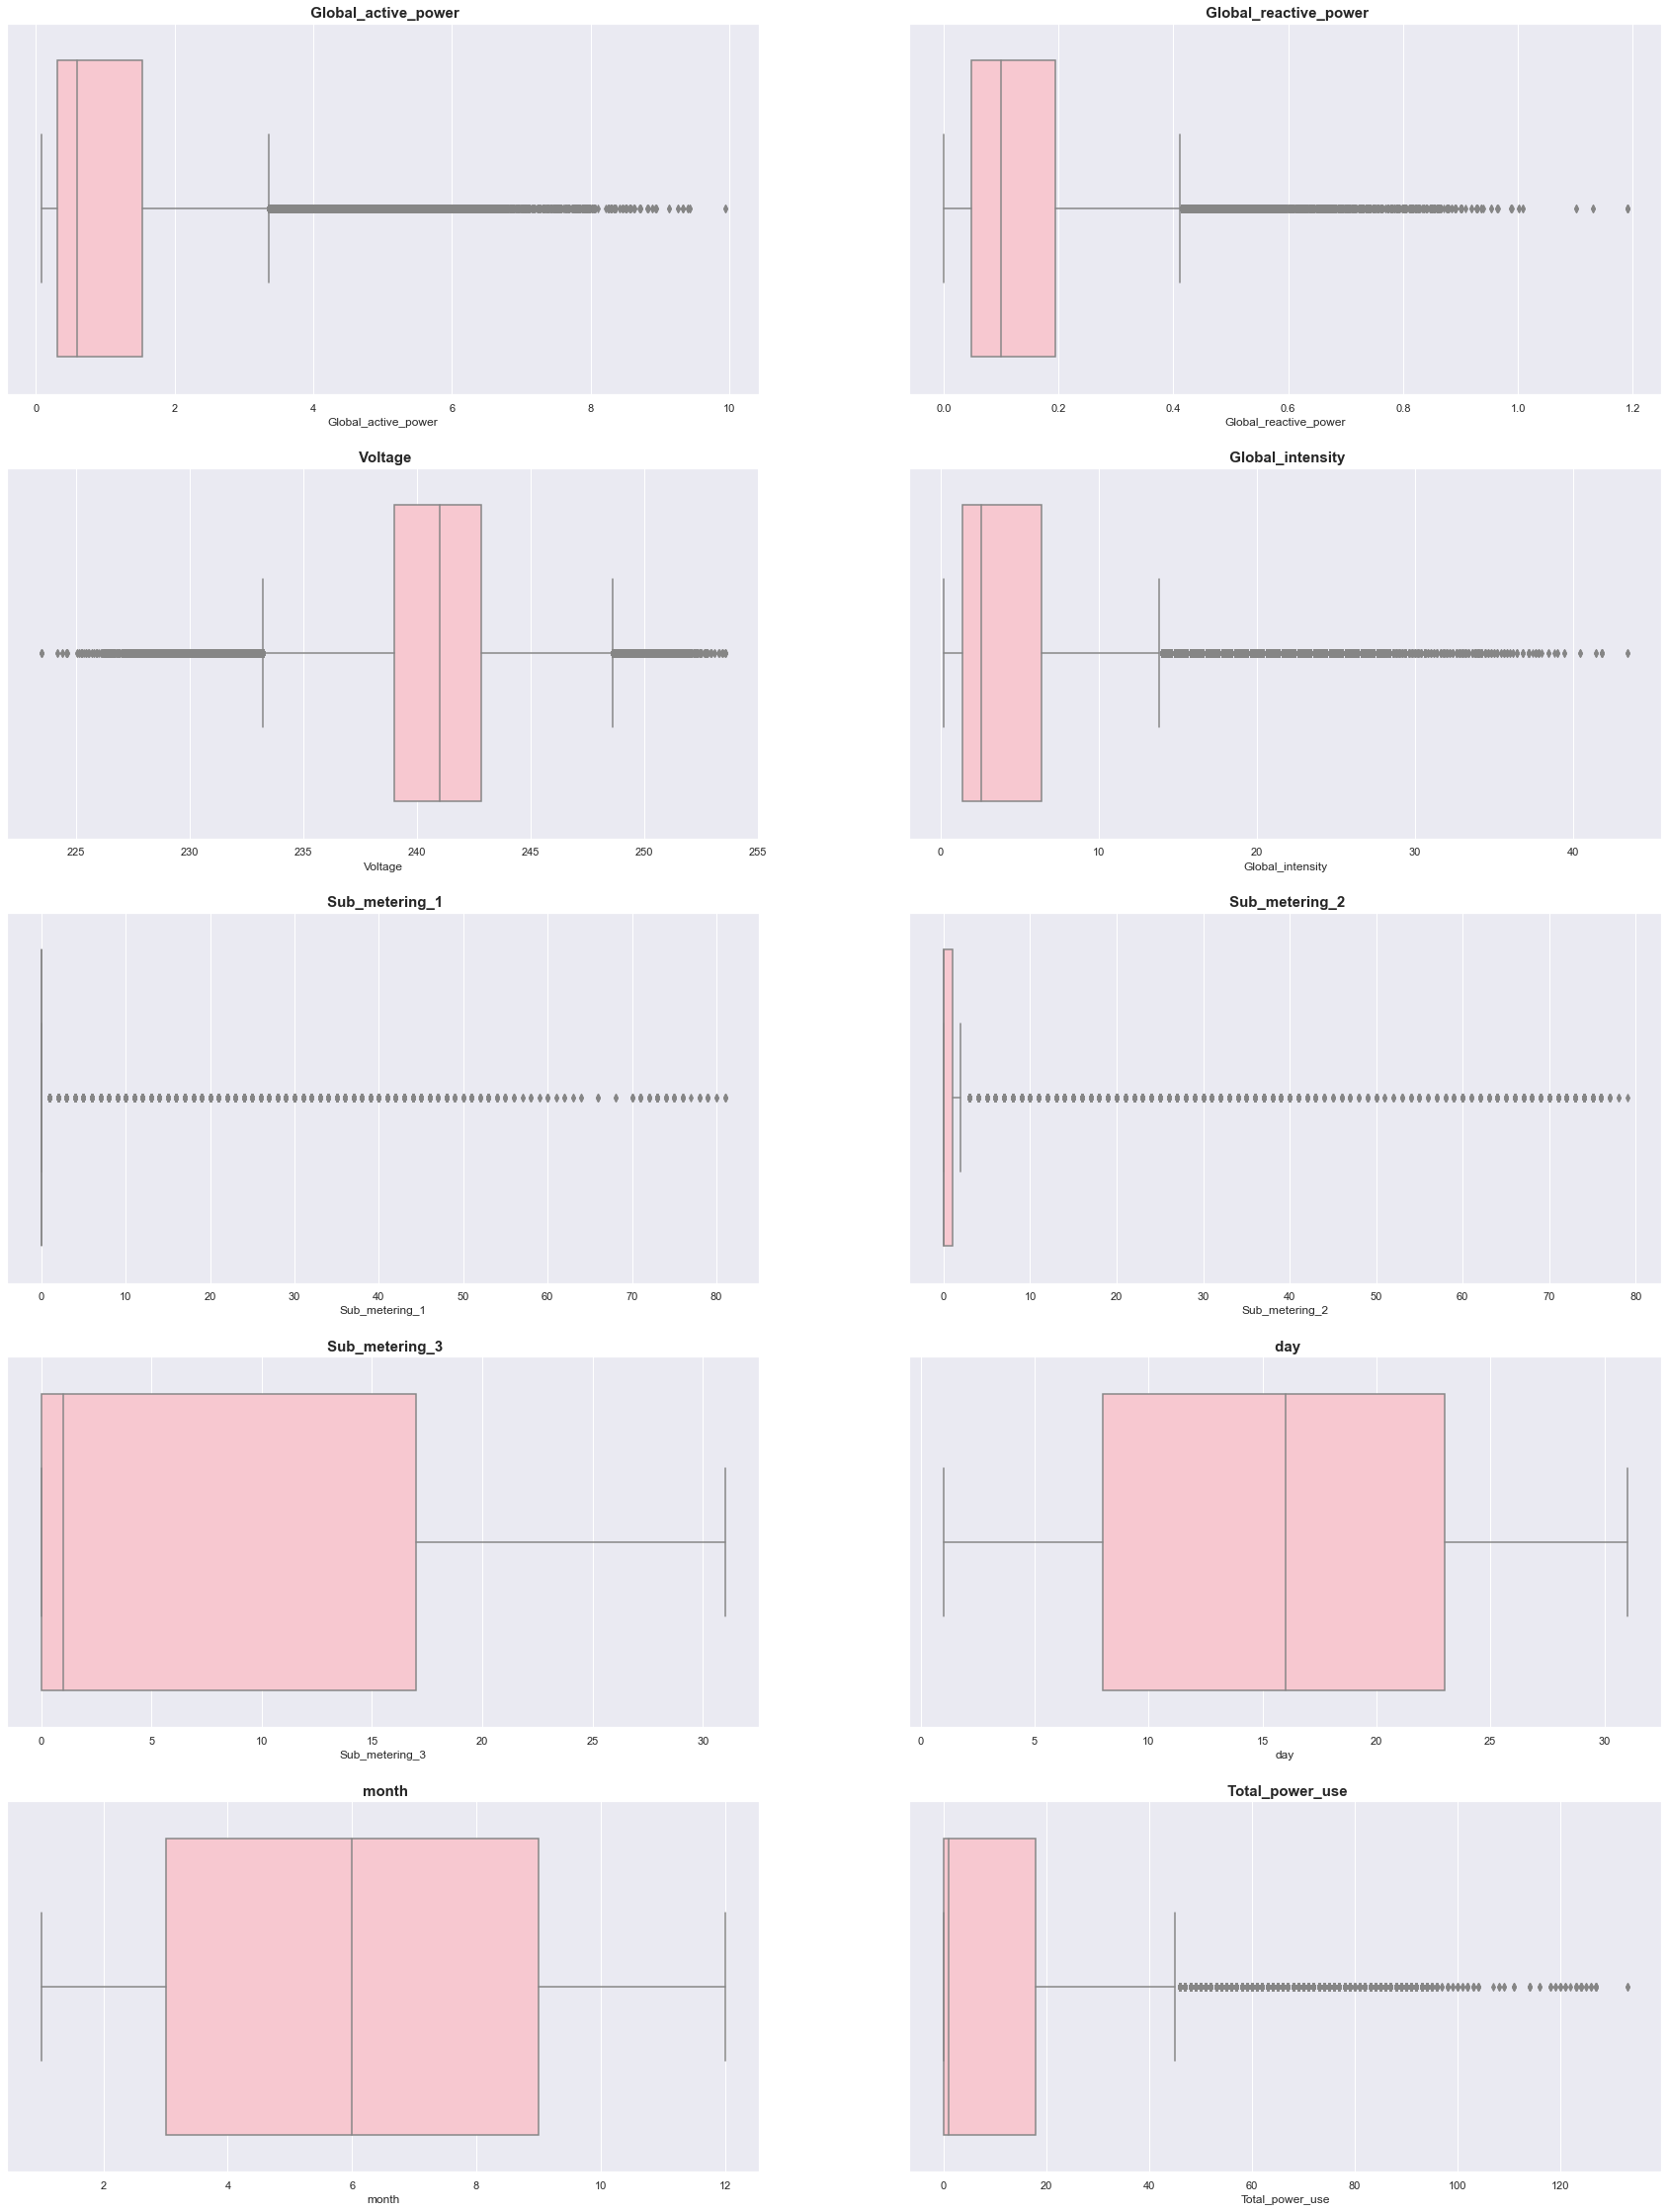

In [63]:
### Checking outliers in numerical features
plt.figure(figsize=(30,40))
for feature in enumerate(numerical_features):
    plt.subplot(5,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=data_mongodb , x= feature[1], color='pink')
    plt.title(' {}' .format(feature[1]) , fontsize=15, fontweight='bold')
plt.show();


# <span style='color:red'> 3.3.4 Correlation and heatmap </span>

In [68]:
corr = round(data_mongodb.corr(),2)
corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,Total_power_use
Global_active_power,1.00,0.24,-0.40,1.00,0.48,0.43,0.64,0.00,-0.04,0.85
Global_reactive_power,0.24,1.00,-0.11,0.26,0.13,0.14,0.09,-0.00,0.03,0.18
Voltage,-0.40,-0.11,1.00,-0.41,-0.19,-0.17,-0.27,0.02,-0.02,-0.34
Global_intensity,1.00,0.26,-0.41,1.00,0.49,0.44,0.63,0.00,-0.04,0.84
Sub_metering_1,0.48,0.13,-0.19,0.49,1.00,0.06,0.10,-0.01,-0.01,0.57
Sub_metering_2,0.43,0.14,-0.17,0.44,0.06,1.00,0.08,0.01,-0.01,0.53
Sub_metering_3,0.64,0.09,-0.27,0.63,0.10,0.08,1.00,0.00,-0.04,0.74
day,0.00,-0.00,0.02,0.00,-0.01,0.01,0.00,1.00,0.02,-0.00
month,-0.04,0.03,-0.02,-0.04,-0.01,-0.01,-0.04,0.02,1.00,-0.03
Total_power_use,0.85,0.18,-0.34,0.84,0.57,0.53,0.74,-0.00,-0.03,1.00


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Global_active_power'),
  Text(1.5, 0, 'Global_reactive_power'),
  Text(2.5, 0, 'Voltage'),
  Text(3.5, 0, 'Global_intensity'),
  Text(4.5, 0, 'Sub_metering_1'),
  Text(5.5, 0, 'Sub_metering_2'),
  Text(6.5, 0, 'Sub_metering_3'),
  Text(7.5, 0, 'day'),
  Text(8.5, 0, 'month'),
  Text(9.5, 0, 'Total_power_use')])

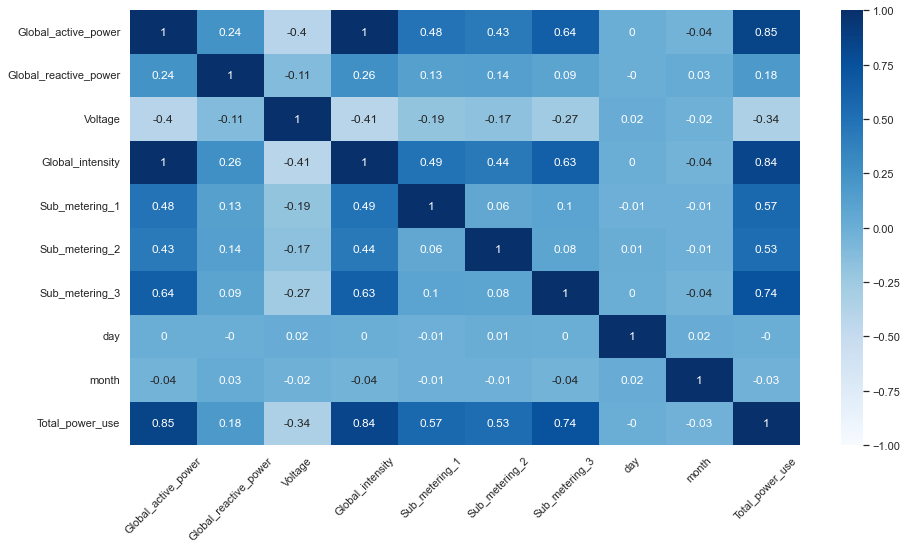

In [74]:
### Plotting heatmap for visualising the correlation between features

sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data= corr , vmin=-1, vmax=1,cmap='Blues',annot= True)
plt.xticks(rotation=45)

# <span style='color:red'> 3.4 Top and Bottom 10 Total Power Use values wrt count </span>

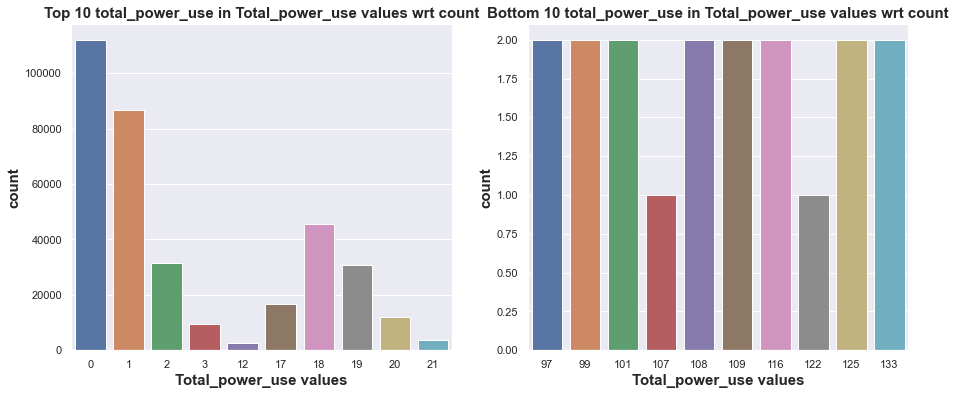

In [90]:
for feature in ['Total_power_use']:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(y=data_mongodb['Total_power_use'].value_counts()[:10],x =data_mongodb['Total_power_use'].value_counts().index[:10])
    plt.ylabel('count',fontsize=15,fontweight='bold')
    plt.xlabel('{} values'.format(feature),fontsize=15,fontweight='bold')
    plt.title('Top 10 total_power_use in {} values wrt count'.format(feature),fontsize=15,fontweight='bold')


    plt.subplot(122)
    sns.barplot(y= data_mongodb['Total_power_use'].value_counts()[-10:],x=data_mongodb['Total_power_use'].value_counts().index[-10:])
    plt.xlabel('{} values'.format(feature),fontsize=15,fontweight='bold')
    plt.ylabel('count',fontsize=15,fontweight='bold')
    plt.title('Bottom 10 total_power_use in {} values wrt count'.format(feature), fontsize=15,fontweight='bold')
    plt.show();
    

# <span style='color:red'> 3.5 Top and Bottom 10 Total Power Use values wrt sum </span>

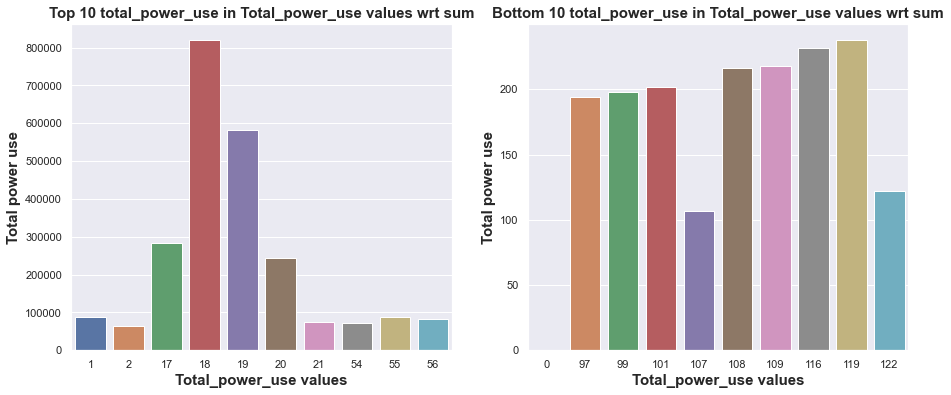

In [92]:
for feature in ['Total_power_use']:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(y=data_mongodb.groupby(feature)[feature].sum().sort_values(ascending=False)[:10],x =data_mongodb.groupby(feature)[feature].sum().sort_values(ascending=False).index[:10])
    plt.ylabel('Total power use',fontsize=15,fontweight='bold')
    plt.xlabel('{} values'.format(feature),fontsize=15,fontweight='bold')
    plt.title('Top 10 total_power_use in {} values wrt sum'.format(feature),fontsize=15,fontweight='bold')


    plt.subplot(122)
    sns.barplot(y= data_mongodb.groupby(feature)[feature].sum().sort_values(ascending=False)[-10:],x=data_mongodb.groupby(feature)[feature].sum().sort_values(ascending=False).index[-10:])
    plt.xlabel('{} values'.format(feature),fontsize=15,fontweight='bold')
    plt.ylabel('Total power use',fontsize=15,fontweight='bold')
    plt.title('Bottom 10 total_power_use in {} values wrt sum'.format(feature), fontsize=15,fontweight='bold')
    plt.show();

# <span style='color:red'> 3.6 Top and Bottom 10 Total Power Use values wrt Mean </span>

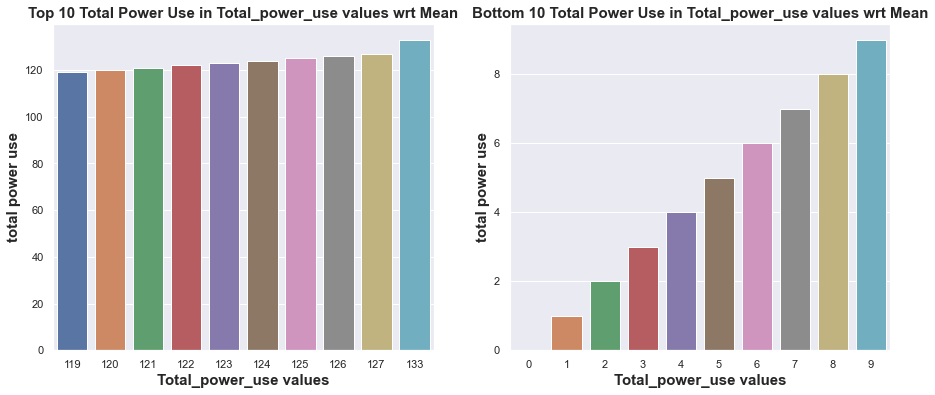

In [94]:
for feature in ['Total_power_use']:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(y=data_mongodb.groupby(feature)[feature].mean().sort_values(ascending=False)[:10],x=data_mongodb.groupby(feature)[feature].mean().sort_values(ascending=False).index[:10])
    plt.ylabel('total power use',fontsize=15,fontweight='bold')
    plt.xlabel('{} values'.format(feature),fontsize=15,fontweight='bold')
    plt.title('Top 10 Total Power Use in {} values wrt Mean'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    sns.barplot(y=data_mongodb.groupby(feature)[feature].mean().sort_values(ascending=False)[-10:],x=data_mongodb.groupby(feature)[feature].mean().sort_values(ascending=False).index[-10:])
    plt.ylabel('total power use',fontsize=15,fontweight='bold')
    plt.xlabel('{} values'.format(feature),fontsize=15,fontweight='bold')
    plt.title('Bottom 10 Total Power Use in {} values wrt Mean'.format(feature),fontsize=15,fontweight='bold')
    plt.show();